In [1]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
pd.options.mode.chained_assignment = None

In [2]:
#load both datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
#drop id column because it's not used as predictor but save test.ID in another df for submission purpose 
test_ID = test.Id
train=train.drop(['Id'], axis=1)
test=test.drop(['Id'], axis=1)

C:\Users\oggy0\AppData\Local\Temp\ipykernel_3012\4282363766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.791'),
 Text(0, 0, '0.709'),
 Text(0, 0, '0.640'),
 Text(0, 0, '0.623'),
 Text(0, 0, '0.614'),
 Text(0, 0, '0.606'),
 Text(0, 0, '0.561'),
 Text(0, 0, '0.534'),
 Text(0, 0, '0.523'),
 Text(0, 0, '0.507'),
 Text(0, 0, '0.486'),
 Text(0, 0, '0.477'),
 Text(0, 0, '0.467'),
 Text(0, 0, '0.386'),
 Text(0, 0, '0.352'),
 Text(0, 0, '0.324'),
 Text(0, 0, '0.319'),
 Text(0, 0, '0.316'),
 Text(0, 0, '0.284'),
 Text(0, 0, '0.264'),
 Text(0, 0, '0.227'),
 Text(0, 0, '0.214'),
 Text(0, 0, '0.168'),
 Text(0, 0, '0.111'),
 Text(0, 0, '0.092'),
 Text(0, 0, '0.046'),
 Text(0, 0, '0.045'),
 Text(0, 0, '-0.011'),
 Text(0, 0, '-0.017'),
 Text(0, 0, '-0.021'),
 Text(0, 0, '-0.026'),
 Text(0, 0, '-0.029'),
 Text(0, 0, '-0.078'),
 Text(0, 0, '-0.084'),
 Text(0, 0, '-0.129'),
 Text(0, 0, '-0.136')]

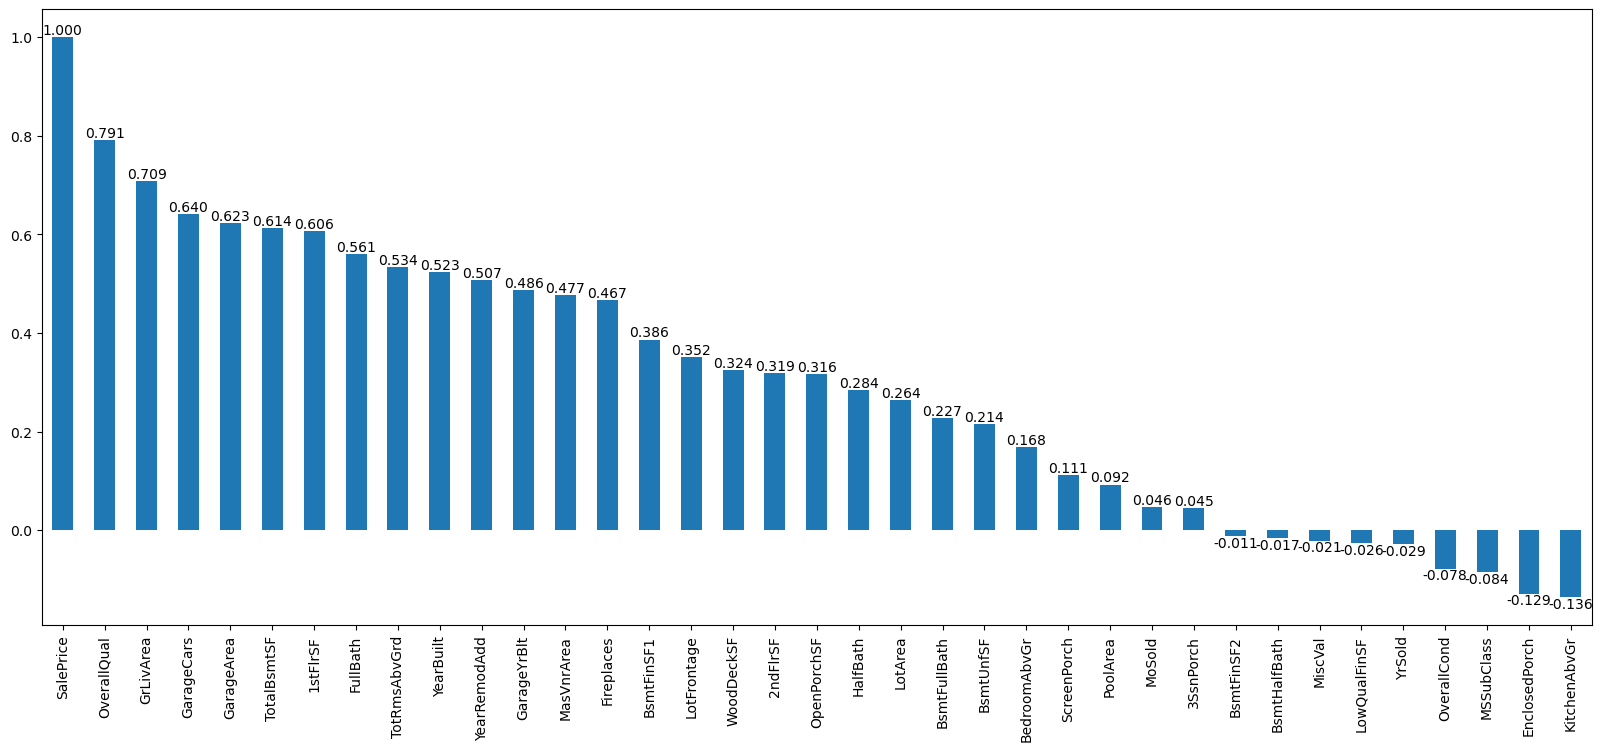

In [6]:
plt.figure(figsize=(20,8))
ax=train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

In [7]:
df = train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1460 non-null   int64
 1   OverallQual  1460 non-null   int64
 2   GrLivArea    1460 non-null   int64
 3   GarageCars   1460 non-null   int64
 4   GarageArea   1460 non-null   int64
 5   TotalBsmtSF  1460 non-null   int64
 6   1stFlrSF     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [10]:
df_predict = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]

In [16]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageCars   1459 non-null   float64
 3   GarageArea   1459 non-null   float64
 4   TotalBsmtSF  1459 non-null   float64
 5   1stFlrSF     1459 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 68.5 KB


In [15]:
df_predict = df_predict.fillna(df_predict.median())

In [17]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predicting the test results
y_pred = model.predict(X_test)

In [21]:
#use trained modelto predict test values
data_sc = sc.transform(df_predict.iloc[:,:].values)
SalePrice_predict = model.predict(data_sc)

In [23]:
SalePrice_predict = pd.Series(SalePrice_predict) 

In [24]:
new_df = pd.concat([test_ID,SalePrice_predict])

In [25]:
new_df.to_csv('submission.csv', index=False)

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil